추정과 가설검정
교차분석
t-test
분산분석
상관분석
요인분석
비모수통계분석

----

대응분석
포지셔닝분석
컨조인트분석
다차원척도법


reference
- [Handling ties in Wilcoxon Signed test](https://www.jstor.org/stable/2284536?seq=1#metadata_info_tab_contents)
- [추정과 가설검정에 대한 설명](https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing)
- [맥니마의 검정](https://3months.tistory.com/230)
- [Correspondence Analysis](https://codefying.com/2018/12/21/introduction-to-correspondence-analysis/)



1. 추정과 가설검정
2. Associative Analysis
    - 상관분석
        - 피어슨상관계수
        - 편상관계수
        - 스피어만상관계수
        - 정준상관계수
    - 교차분석
        - 카이제곱검정
        - 피셔의 정확검정
        - 맥니마검정
3. Comparative Analysis
   -  t-test
       - 일표본t검정
       - 대응표본t검정
       - 독립표본t검정
   - 분산분석
       - 일원분산분석
       - 이원분산분석
       - MANOVA
       - ANCOVA  
4. 포지셔닝분석
    - 다차원척도법(MDS)
        - 계량적MDS
        - 비계량적MDS
    - 상응분석(CA)
        - 단순상응분석
        - 다중상응분석
6. 비모수통계분석  
    - 적합도검정
        - 런검정
        - 콜모고로프 스미노르프 검정
    - 동질성검정
        - 윌콕슨부호순위검정
        - 맨휘트니검정
        - 크루스칼 왈리스 검정
        - 프리드만 검정
    - 상관성검정
        - 스피어만 상관분석
        - 켄달타우 상관계수

7. 연관성분석

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings  ##warning sign 출력 무시
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.5f' % x)  ##scientific notation 삭제
plt.rcParams['font.family'] = 'Malgun Gothic'  ##한글폰트 설정
plt.rcParams['axes.unicode_minus'] = False    ##마이너스기호 깨짐 방지

In [2]:
### 기본데이터 = 타이타닉
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.00000,1,0,7.25000,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.00000,1,0,71.28330,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.00000,0,0,7.92500,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.00000,1,0,53.10000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.00000,0,0,8.05000,S,Third,man,True,NaN,Southampton,no,True


In [3]:
### 기본데이터2 = 쇼핑몰 설문조사 데이터
df2 = pd.read_csv('예제데이터/Ashopping.csv', encoding = 'euc-kr')
df2.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6


# CDA(Confirmative Data Analysis)
- 어떤 현상이 우연인지 아닌지 판단하기 위해 가정을 세우고 가정을 검증하는 과정
- 추정치 생성, 그룹 간 분산 및 평균 분석, 회귀분석 등이 CDA 과정에 해당함
- 일반적으로 많이 알고 있는 EDA는 빅데이터셋에서 데이터에 대한 예측을 만들기 위해 사용함. 주로 결측값이나 이상치 파악, 주요변수 파악 및 특정 알고리즘을 사용하기 위한 검정이 EDA에 해당함

## 추정과 가설검정
- 가설: 연구가설을 설정한 뒤, 가설 검증을 위한 귀무가설과 대립가설을 설정한다. 
    - 연구가설: A는 B와 차이가 있을 것이다. (연구자가 확인하고 싶은 내용)
    - 귀무가설: A와 B는 같다.
    - 대립가설: A와 B는 같지 않다.

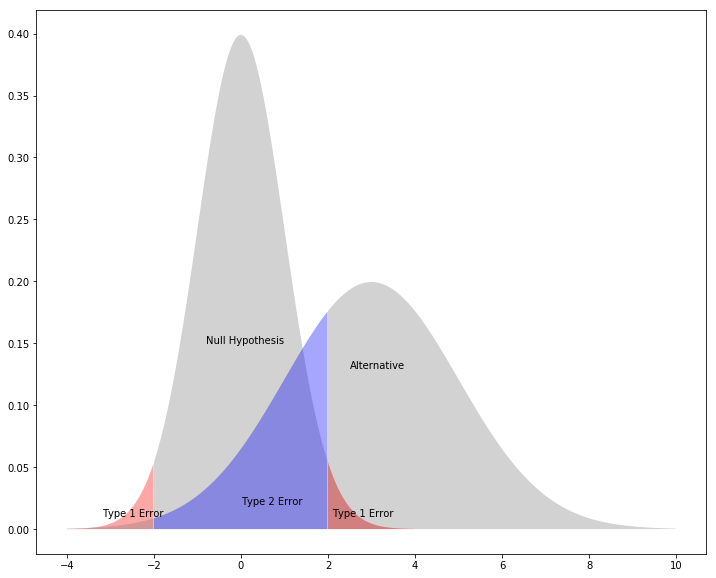

# Associative Type Test

## 상관분석
### 1. Pearson 상관계수
- 두 개의 연속형 데이터가 선형 관계에 있는지 검정
- 데이터가 독립성, 정규성, 등분산성을 가진다고 가정
    - 두 변수가 이변량 정규분포를 따르는 것이 기본 가정이지만 이변량 정규분포를 확인하는 것은 어렵기 때문에 각각 정규분포를 따르는 것으로 조건 완화
    - 정규성을 가정한 검정이기 때문에 이상치에 민감한 특성이 있음
- 피어슨상관계수 p = $Covariance(X, Y) \over stdv(X) \; stdv(Y)$
- 가설
    - H0: 두 데이터의 pearson 상관계수 p = 0 (변수 X와 변수 Y는 관계가 없다)
    - H1: 두 데이터의 pearson 상관계수 p $\neq$ 0 (변수 X와 변수 Y 사이에 관계가 있다)

In [16]:
from scipy import stats
stats.pearsonr(df2['총_매출액'], df2['방문빈도']) ##상관계수, p-value 출력

(0.6311706453193394, 3.0519604496876793e-112)

참고1) 피어슨 상관계수는 선형성을 가정하여 상관관계의 크기를 나타낸 것이므로 데이터가 선형성을 띄지 않는다면 p-value가 작더라도 유의하지 않을 수 있다. p-value는 선형강도에 상관없이 표본의 크기가 커지면 작아질 수 있다. 따라서 표본 모집단의 정규성 및 등분산성, 선형성을 확인해야 한다.

LeveneResult(statistic=341.645104622196, pvalue=1.521134833714759e-70)


<AxesSubplot:xlabel='총_매출액', ylabel='방문빈도'>

g:\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
g:\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
g:\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
g:\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
g:\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
g:\python\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
g:\python\lib\site-packages\matplotlib\b

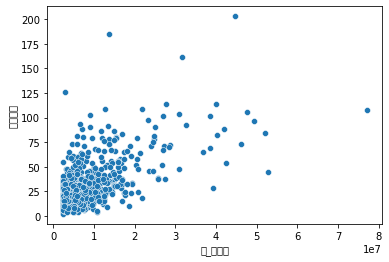

In [20]:
## 등분산성 확인
print(levene(df2['총_매출액'], df2['방문빈도']))

## 선형성 확인
sns.scatterplot(x = '총_매출액', y = '방문빈도', data = df2)

참고2) 상관관계 테이블 출력하기  
3개 이상의 변수들 사이에서 피어슨 상관계수를 빠르게 확인한다

In [18]:
df2_subset = df2[['총_매출액', '방문빈도', '구매_카테고리_수']]
df2_subset.corr(method = 'pearson').style.background_gradient().set_properties(**{'font-size':'10pt'})

,총_매출액,방문빈도,구매_카테고리_수
총_매출액,1.000000,0.631171,0.308347
방문빈도,0.631171,1.000000,0.395861
구매_카테고리_수,0.308347,0.395861,1.000000


결과해석: 매출액과 방문빈도 간 상관관계가 매출액과 구매 카테고리 수 사이의 상관관계보다 높기 때문에, 쇼핑몰의 매출액을 강화시키기 위해서는 고객들의 구매 카테고리 수를 증가시키기 보다는 고객들의 더 잦은 방문을 유도하는 것이 필요

### 2. 편(부분) 상관계수
- X와 Y 사이에 영향을 미치는 제 3의 변수 Z를 통제한 상태에서 구한 X-Y 간 상관계수를 '편 상관계수'라고 부름
- 이렇게 Z를 통제하고 구한 X와 Y의 상관계수는 '1차 편상관계수'라고 부른다. 여기서 'n차'는 X와 Y의 상관계수를 구할 때 통제된 변수의 숫자이다.
- X와 Y 각각에서 Z에서 선형적으로 설명되는 부분을 제거하고 남은 잔차들의 상관계수를 구한다. (Y-aZ-k1)와 (X-bZ-k2)의 상관계수를 구한다는 이야기인 듯
- X와 Y의 편상관계수 공식
 $r_{xy \cdot z}=\ \frac{r_{xy}-r_{xz}\cdot r_{yz}}{\sqrt{1-r_{xz}^2} \cdot \sqrt{1-r_{yz}^2}}$
- $r_{xy}\ =\ \frac{cov\left(xy\right)}{\sqrt{var\left(x\right)var\left(y\right)}}\ \left(zero\ order\ partial\ correlation\right)$ - 0차 상관계수는 아무런 통제변수가 없는 상태의 상관계수를 의미
- 편상관계수의 상관관계 검정
  - H0: Z가 통제된 상황에서 X와 Y는 유의한 선형관계를 갖지 않는다
  - H1: Z가 통제된 상황에서 X와 Y는 유의한 선형관계를 갖는다
  
- pingouin.partial_corr(data, x, y, covar - string or list, x_covar - string or list, y_covar - string or list, alternative, method)
    - method : 'pearson' or 'spearman'
    - x_covar : 해당 하이퍼파라미터로 지정된 변수는 x에서만 영향력이 제거됨
    - y_covar : y에서만 영향력을 제거함

In [23]:
from pingouin import partial_corr
partial_corr(data = df2, x = '총_매출액', y = '방문빈도', covar = '구매_카테고리_수').round(3)  ##n(sample size), r(correlation), CI95, p-val 순으로 출력

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,1000,0.58300,"[0.54, 0.62]",0.34000,0.33800,0.00000,2.242e+88,1.00000


### 3. Spearman 상관계수
- 비모수적 방법으로, 서열척도(rank)로 이루어진 변수들 간의 상관계수를 검증하기 위함
- $ {r}_s\ =\frac{\sum _{i=1}^n\left(i-\frac{n+1}{2}\right)\left(R_i\ -\ \overline {R}\right)}{\sqrt{\sum _{i=1}^n\left(i-\frac{n+1}{2}\right)^2}\sqrt{\sum _{i=1}^n\left(R_i\ -\ \overline {R}\right)^2}}$  , i는 x값의 순위, r은 y값의 순위
- 1일 경우 두 변수의 서열이 완벽하게 일치한다고 해석, -1인 경우 두 변수의 서열이 완벽하게 반대임을 의미
- 가설
    - H0: X순위와 Y순위는 연관성이 없다

In [24]:
from scipy.stats import spearmanr
stats.spearmanr(df2['1회_평균매출액'], df2['방문빈도'])

SpearmanrResult(correlation=-0.4988411248473936, pvalue=4.929293870381245e-64)

### 4. 정준상관분석 (Canonical Correlation Analysis)
- n개 변수의 선형 결합으로 이루어진 변수 X를 정준변수(cannonical variate)라고 부른다. 
- 두 정준변수 X와 Y의 상관관계를 정준상관계수라고 부름
- 원칙적으로 CCA에 사용하는 모든 변량은 연속형이어야 하지만, 범주형 데이터를 더미화해서 사용하는 것도 가능하다
- 정준상관분석의 귀무가설
  - H0: 정준변수 X와 정준변수 Y는 연관성이 없다

Step1. 정준변수 생성하기

In [ ]:
from sklearn.cross_decomposition import CCA

U = df2[['매장_청결성', '공간_편의성', '시야_확보성', '음향_적절성']] ##매장 인테리어 만족도라는 정준변수로 설정
V = df2[['친절성', '신속성', '책임성', '정확성', '전문성']]  ## 직원 만족도라는 정준변수로 설정

cca = CCA(n_components = 1).fit(U,V) ##n_components는 몇 개의 그룹으로 나누어서 정준상관계수를 구할 것인지 설정(max = 한 정준변수를 구성하는 변수 수)
U_c, V_c = cca.transform(U,V)
U_c1 = pd.DataFrame(U_c)[0]
V_c1 = pd.DataFrame(V_c)[0]
print(U_c)  ##U_c와 V_c는 각각 하위변수들로 만들어진 정준변수값 (관측치 개수만큼 생성)
print(V_c)

Step2. 정준변수 간 상관관계 구하기

In [28]:
stats.pearsonr(U_c1, V_c1)

(0.537610055722476, 5.574139659006864e-76)

두 정준변수 간 상관분석 결과를 확인하면 p-value는 0.05 이하이며, 상관계수 p값이 약 0.5로 약한 양의 상관관계가 존재한다.

Step3. 정준적재량, 교차적재량 구하기
- 만들어진 정준변수에 가장 많은 영향을 주는 하위변수는 무엇인지 __정준적재량__ 을 통해 계산할 수 있다
- 만들어진 정준변수에 가장 많은 영향을 주는 다른 정준변수의 하위변수는 무엇인지 __교차적재량__ 을 통해 알 수 있다.

In [30]:
### np.corrcoeff는 data1과 data2에 들어간 모든 변량의 상관계수를 구해줌
print('정준변수1과 정준변수1의 하위변수들 간 정준적재량:', np.corrcoef(U_c1.T, U.T)[0, 1:])
print('정준변수1과 정준변수2의 하위변수들 간 교차적재량:', np.corrcoef(U_c1.T, V.T)[0, 1:])
print('정준변수2와 정준변수2의 하위변수들 간 정준적재량:', np.corrcoef(V_c1.T, V.T)[0, 1:])
print('정준변수2와 정준변수1의 하위변수들 간 교차적재량:', np.corrcoef(V_c1.T, U.T)[0, 1:])

정준변수1과 정준변수1의 하위변수들 간 정준적재량: [0.67512627 0.74999324 0.72339665 0.76718716]
정준변수1과 정준변수2의 하위변수들 간 교차적재량: [0.23332877 0.28273143 0.39848041 0.49803734 0.46490251]
정준변수2와 정준변수2의 하위변수들 간 정준적재량: [0.43401118 0.52590429 0.74120715 0.92639141 0.86475784]
정준변수2와 정준변수1의 하위변수들 간 교차적재량: [0.36294246 0.40320237 0.38889766 0.41246431]


해석 예시) 정준변수 1과 정준변수 2의 교차적재량에서 교차적재량이 가장 높은 변수는 '정확성'(0.4980) 이므로, 매장 인테리어 만족도를 높이기 위해서는 직원들의 정확도를 높여야 한다.

## Chisquare test (교차분석)
- 두 범주형 변수의 분할표(Contingency table)에 보이는 빈도를 '우연한 상태의 빈도 기대값'과 비교하여 범주형 변수의 관계를 파악
- 범주형 변수의 관계 유무만 파악할 수 있기 때문에 어떤 관계가 있는지는 추가적인 상관분석 또는 회귀분석이 필요
- 가설
    - H0: A와 B는 서로 관계가 없다 (독립이다)
- 2*2 의 소표본인 경우, p값이 실제보다 작아져 1종오류를 과소평가하는 경향이 있기 때문에 검정통계량을 작게 보정하는 방법을 고려할 수 있다. (예이츠의 연속성 보정)

Step1. 분할표 만들기

In [39]:
## contingency table 만들기
contingency = pd.crosstab(df['survived'], df['who']) ##성별과 타이타닉 생존 여부의 관련성
contingency

who,child,man,woman
survived,,,
0,34,449,66
1,49,88,205


Step2. 카이제곱통계량을 구하고 p-value 계산

In [38]:
from scipy.stats import chi2_contingency

chi2_contingency(contingency)  ##chi2 - 통계량, p - p-value, dof- 자유도, expected - 자연상태의 기대 빈도

(283.923050324233,
 2.2227620817798914e-62,
 2,
 array([[ 51.14141414, 330.87878788, 166.97979798],
        [ 31.85858586, 206.12121212, 104.02020202]]))

## 피셔의 정확검정(직접확률 검정)
- 사건의 발생빈도가 극히 적거나 (5회 이하의 빈도가 전체 셀 중 20% 이상 존재하는 경우), 각 셀의 빈도수 차이가 많이 관찰되는 경우 카이제곱검정의 정확도를 보정하기 위해 사용
- 초기하분포(비복원추출에서 뽑은 n개 중 x개의 사건이 발생한다고 가정하는 분포) 하에 정확한 p-value를 계산함
- scipy의 fisher_exact는 2x2 분할표만 입력할 수 있음
- 2x2 분할표에서 변수 간 독립성 검정을 하는 경우 barnard_exact, boschloo_exact가 더 정확한 검정을 수행할 수 있음(scipy.stats에서 제공)

In [48]:
from scipy.stats import fisher_exact

contingency = pd.crosstab(df['survived'], df['adult_male'])
fisher_exact(contingency)      ## oddsratio, p_value 출력

(0.07716184697402802, 7.000114456071946e-64)

### 맥니마 검정
- 짝지은 명목형 2x2 분할 데이터에서 사용함
- ex) X1: 약을 처방하기 전의 질병상태(1 or 0) , X2: 약을 처방한 후의 질병상태(1 or 0)
- 분할표에서의 marginal probability가 같은지 검정(p(a) + p(b) = p(a) + p(c), p(c) + p(d) = p(b) + p(d))
- 가설
    - H0: $ p_{a} = p_{c} $  (X1 = 1 & X2 = 1인 확률과 X1 = 1 & X2 = 0인 확률이 같다)
    - H1: $ p_{b} \neq p_{C} $
- mcnemar(table, exact = True, correcton = True)
    - exact: True일 때 이항분포로 검정, False일 때 카이제곱분포로 검정
    - correction: True일 때 검정 분포에 연속성보정이 적용됨

In [53]:
from statsmodels.stats.contingency_tables import mcnemar

contingency = [[30,40], [12,18]]
print(mcnemar(contingency, exact = False, correction = False))  ## result: statistics, pvalue

pvalue      0.00010321744149513965
statistic   15.076923076923077


# Comparative Type Test

## t-Test (t 검정)
### 1. 일표본 t검정
- 단일 모집단에서 관심 그룹의 평균이 기준값과 같은지 비교할 때 사용
- 일표본 t검정은 모집단이 정규분포를 따른다고 가정 (*관심그룹의 정규성 검정이 선행되어야 함* but 일반적으로 표본이 20개 이상이면 정규성을 만족한다고 가정)

Step 1. 정규성 검정을 위한 Shapiro-Wilk test

In [3]:
from scipy.stats import shapiro

statistic, p_value = shapiro(df.fare)  ## titanic fare값의 평균이 30인지 확인해보자
print(statistic, p_value)

0.5218914747238159 1.0789998175301091e-43


step2-1. 모집단이 정규성을 만족하지 않을 때 - __윌콕슨 부호순위검정(Wilcoxon Signed Rank Test)__ 을 이용
- 가설
    - H0: 모집단의 중위수가 30(비교하고 싶은 값)이다
    - H1: 모집단의 중위수가 30(비교하고 싶은 값)이 아니다
- 계산방법  
    - |Xi - 30|(관측치에서 예상 중위수를 뺀 값)을 오름차순으로 줄 세워 순위를 매긴다, 절대값 안의 숫자가 음수가 되는 순위는 음수로 처리한다. 이 순위의 값을 전부 더했을 때, 모집단의 중위수가 추정치와 같았다면 순위의 합 W는 0에 가까워진다. 만약 W가 너무 크거나 작으면 귀무가설을 기각하게 된다.   
    - W는 평균은 0 분산은 n(n+1)(2n+1)/6의 통계량을 가지게 되는데, W는 특정한 분포를 갖는 값의 합이라는 점(W의 첫번째 값은 각 0.5의 확률로 1 또는 -1, 두번째 값은 각 0.5의 확률로 +-2가 된다)에서 중심극한정리를 이용해 정규분포에 근사시킬 수 있다. 따라서 W를 이용한 검정은 Z 통계량을 이용하여 기각 또는 채택하게 된다.
- 하이퍼파라미터
    - alternative 
        - 'two-sided'(default)
        - 'less' (H0: 실제 중위수 < 추정값)
        - 'greater' (H0: 중위수 > 추정값)
    - zero_method 
        - 'wilcoxon'(default): |X-mu|가 0이 되는 값을 순위산정 이전에 제거하고 줄어든 샘플로 검정
        - 'pratt': |X-mu|가 0이 되는 값은 순위산정에 포함한 뒤에 합을 구할 때 제거 (W는 중심극한정리에 의한 정규분포를 가정할 수 없게 됨)
        - 'zsplit': 0이 되는 값의 부호를 양수와 음수 중 하나로 결정해줌
        - 'pratt'은 다른 방법에 비해 더 보수적인 검정을 하게 됨
    - nan_policy
        - 'propagate'(default) : NaN이 있으면 결과값도 NaN으로 출력
        - 'omit': Nan값을 생략하고 나머지 값으로 계산한 결과값 출력
        - 'raise': NaN값이 있으면 ValueError 출력

In [4]:
###윌콕슨 부호순위 검정
from scipy.stats import wilcoxon

result = wilcoxon(df.fare - 30)

print(result.pvalue)
print(result.statistic)

1.369432543821431e-15
135268.0


Step2-2. 모집단이 정규성을 만족할 때 - __일표본 t검정__ 을 이용
- H0: 모집단의 평균 mu = 추정값
- 하이퍼파라미터
    - ttest_1samp(a, popmean, axis, nan_policy, alternative)
    - popmean은 H0의 추정평균, omit, alternative는 Wilcoxon과 동일

In [6]:
from scipy.stats import ttest_1samp
result = ttest_1samp(df.fare, 30)
print(result.pvalue)
print(result.statistic)

0.18583845591428397
1.3240136368613238


### 2. 대응표본 t 검정
- 단일 모집단에 대해 특정 이벤트 발생 이전과 이후의 차이를 비교
- 가설
    - 연구가설: 이벤트에 따른 값의 차이가 없을 것이다.
    - H0: 이전 집단과 이후 집단 값 차이의 평균은 0이다.
    - H1: 이전 집단과 이후 집단 값 차이의 평균은 0이 아니다. 
- t-statistic = ${차이값의 평균 \over 차이 평균의 표준오차} $
- (이벤트 발생 이전값 - 이벤트 발생 이후값)이 정규성을 만족하며 연속형이어야 한다는 기본가정이 존재. Shapiro Wilk test 또는 샘플의 개수를 기반으로 판단할 수 있음.
- 하이퍼파라미터
    - ttest_rel(a, b, axis, nan_policy, alternative)
    - nan_policy: ttest_1samp와 동일
    - alternative: ttest_1samp와 동일

In [8]:
test_data = {
    'before': [7,3,4,5,2,1,6,6,5,4],
    'after':[8,4,5,6,2,3,6,8,6,5]
}
test_data = pd.DataFrame(test_data)


from scipy.stats import ttest_rel

result = ttest_rel(test_data['before'], test_data['after'])
print(result.statistic)
print(result.pvalue)

-4.743416490252569
0.001053871257016553


### 3. 독립표본 t검정
- 두 개의 독립된 모집단의 평균을 비교 (ex. 성별 - 범주형데이터 에 따른 출근 준비시간 - 연속형 데이터 이 다른가?)
- 가설
    - 연구가설: 범주형 변수에 따른 연속형 변수의 차이가 존재할 것이다. 
    - H0: $\mu_{A} - \mu_{B} = 0$
- 두 모집단은 모두 정규성을 만족하고, 서로 독립이어야 함 (독립이다 = 두 집단이 서로 영향을 주고 있지 않다)
- 두 모집단의 등분산성 성립에 따라 검정통계량 계산 방법이 달라짐

Step1. 등분산성 여부를 확인 - __Levene's test__
- Levene's test의 가설
    - H0: $\sigma^{2}_{1} = \sigma^{2}_{2} = \sigma^{2}_{3} = ... = \sigma^{2}_{k}$ (모든 집단의 분산이 같다)
    - H1: $\sigma^{2}_{i} \neq \sigma^{2}_{j}$ for at least one pair (i,j) (적어도 한 집단의 분산이 같지 않다)  
- W= $(N−k)\over(k−1)$ $\Sigma_{i=1}^{k}N_{i} {(\bar{Z}_{i} - \bar{Z}_{..})^{2} } \over \Sigma_{i=1}^{k} \Sigma_{j=1}^{N_{i}}{(Z_{ij}−\bar{Z}_{i.})}^{2}$    (전체 표본크기 N이 범주형변수에 따른 그룹 k개로 쪼개졌고 $N_{i}$는 i번째 그룹의 표본을 의미한다. $Z_{ij}$를 구하는 방법에 따라 하이퍼파라미터가 달라진다.
- 하이퍼파라미터
    - levene(sample1, sample2, .... , center, proportiontocut)
    - center ($Z_{ij}$를 구하는 방법)
        - 'median'(default) 
            - $Z_{ij} = |Y_{ij} - \tilde{Y}_{i.}|$ 관측된 Y값에서 i번째 그룹의 중앙값을 뺀 값
            - 왜도가 높은(정규성을 보이지 않는) 데이터에 적합
        - 'mean'
            - $Z_{ij} = |Y_{ij} - \bar{Y}_{i.}|$  관측된 Y값에서 i번째 그룹의 평균을 뺀 값
            - 대칭이며 꼬리분포가 적당한 데이터에 적합 (정규성)
        - 'trimmed'
            - $Z_{ij} = |Y_{ij} - \bar{Y}_{i.}^{'}|$  관측된 Y 값에서 양쪽 10% 값을 제한 (trimmed data) 데이터들의 평균을 뺌
            - 두터운 꼬리 분포를 가지는 데이터에 적합
    - proportiontocut (default = 0.05)  
    : center이 'trimmed'일 때 양쪽에서 몇 퍼센트의 비율만큼 데이터를 제외할 것인지 결정
      
- Bartlett test
    - 분산의 동질성을 검정하지만 Levene's test와 달리 표본이 정규성을 만족할 때만 사용할 수 있음

In [10]:
from scipy.stats import levene

result = levene(df[df['adult_male']==1]['fare'], df[df['adult_male']==0]['fare']) ## 남자와 여자의 표 값을 비교하기 위해 등분산 검정
print(result.statistic)
print(result.pvalue)

16.59972698234938
5.028279844812678e-05


Step2. 등분산성 여부에 맞게 독립표본 t 검정을 실행
- 하이퍼파라미터
    - ttest_ind(a, b, axis, equal_var, nan_policy, permutations, random_state, alternative, trim)
    - equal_var (default : True)
        - 두 모집단이 등분산성을 만족할 때 True
        - 두 모집단이 등분산성을 만족하지 않을 때 False (Welch's t-test로 계산됨)
    - permutations (default : None or 0)
        - None 일시 t 분포를 가정한 p-value를 계산함
        - 숫자만큼 무작위의 순열검정을 수행하여 p-value를 계산
        - random_state는 permutation test 수행 시 seed를 지정해줌
    - alternative (default: 'two-sided')
        - 'less': 첫번째 샘플의 평균 < 두번째 샘플의 평균
        - 'greater': 첫번째 샘플의 평균 > 두번째 샘플의 평균
    - trim (default: 0)
        - 해당 비율만큼 각 샘플의 양쪽 값을 제거하고 검정을 수행(Yuen's t-test or Trimmed t-test)

In [13]:
from scipy.stats import ttest_ind

result = ttest_ind(df[df['adult_male']==1]['fare'], df[df['adult_male']==0]['fare'], equal_var = False) ## 등분산성을 만족하지 않음
print(result.statistic)
print(result.pvalue)

-5.267344838807816
1.897839302718044e-07


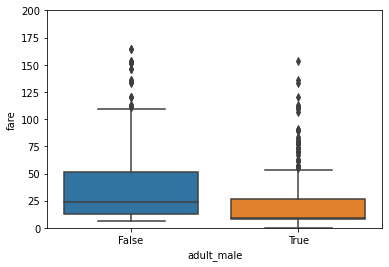

In [45]:
## t-test 결과를 시각화
fig = sns.boxplot(x = 'adult_male', y = 'fare', data = df)
fig.set(ylim=(0, 200))
plt.show()

## 분산분석
3개 이상의 그룹 간 평균 차이를 알고 싶을 때 분산분석을 사용  
### 1. 단일변량분산분석 - (1) 일원분산분석(One-way ANOVA)
- 단일변량분산분석은 종속변수가 __1개일 때__ 집단 간 종속변수의 차이를 분석
- 그 중 일원분산분석은 집단을 나누는 __독립변수가 1개__ 일 때 사용
    - ex) 고객 등급 별 매장방문 횟수 차이 검정
- 가설
    - H0: $\mu_{1} = \mu_{2} = ... = \mu_{k}$ (각 그룹의 모집단 평균은 모두 같다)
    - H1: $\mu_{i} \neq \mu_{j}\; for \;at \;least\; one \;(i,j)$ (적어도 한 그룹의 모집단 평균이 다르다)
- One-way ANOVA의 기본 가정으로 각 그룹의 데이터는 독립성, 정규성, 등분산성을 만족한다 (독립성은 일반적으로 존재한다고 봄)
- 그룹 간 분산과 그룹 내 분산의 크기를 비교하여 가설을 검정하며, F-통계량을 사용

Step1. 정규성, 등분산성 유무 확인 (정규성은 표본 개수로도 확인 가능)

In [22]:
##class에 따른 fare차이
a = df[df['pclass']==1]['fare']
b = df[df['pclass']==2]['fare']
c = df[df['pclass']==3]['fare']

print("정규성:", shapiro(a), shapiro(b), shapiro(c))
print('\n')
print("등분산성: ", levene(a, b, c)) 

정규성: ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19) ShapiroResult(statistic=0.7785055637359619, pvalue=2.1134516002102284e-15) ShapiroResult(statistic=0.6183854937553406, pvalue=1.5995106796893175e-31)


등분산성:  LeveneResult(statistic=118.57020037111805, pvalue=2.288618662046418e-46)


Step2-1. 등분산성을 만족하는 경우 
- f_oneway(a,b,..., axis)

In [23]:
from scipy.stats import f_oneway
result = f_oneway(a, b, c)
print(result.statistic)
print(result.pvalue)

242.34415651744814
1.0313763209141171e-84


Step2-2. 등분산성을 만족하지 않는 경우 (Welch's ANOVA)
- pingouin 패키지 활용 (설치되어 있지 않을 시 pip install pingouin 명령어로 설치)
- welch_anova(data, dv - 종속변수명, between - 독립변수인 범주형변수명)
- 결과값
    - 'Source': Factor names
    - 'SS': Sums of squares
    - 'DF': Degrees of freedom
    - 'MS': Mean squares
    - 'F': F-values
    - 'p-unc': uncorrected p-values
    - 'np2': Partial eta-squared

In [24]:
import pingouin as pg
pg.welch_anova(dv = 'fare', between = 'pclass', data = df)

,Source,ddof1,ddof2,F,p-unc,np2
0,pclass,2,333.63337,102.00059,0.00000,0.35309


g:\python\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
g:\python\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Step3. 사후검정 (등분산성 만족 시 Tukey's Test, 만족하지 않을 시 Games Howell's test)
- 일원배치분산분석 결과 p-value가 0.05 아래로 귀무가설을 기각한다면, 어떤 집단에서 평균 차이가 발생하는지 사후검정이 필요
- 사후검정 방법
    - Tukey test (샘플 크기가 다를 시 Tukey-Kramer 검정)
        - 모든 그룹의 pairwise한 조합 간 평균을 비교한다
        - 등분산성 만족 필요
    - Scheffe test
        - 그룹 간 pairwise한 비교를 넘어 더 많은 조합을 고려한다(ex. A 그룹과 B그룹의 모평균 합 = C와 D의 모평균 합)
        - 따라서 신뢰구간이 넓어지며, 검정력이 낮아진다.
        - 등분산성 만족 필요
    - Bonferroni test (Dunn's test의 일종)
        - 그룹 간 표본 크기에 영향을 받지 않으나, 특정 그룹 간의 비교를 사전에 생각해두었을 때 사용함
        - 등분산성 만족 필요
    - Games Howell's test
        - 등분산성 필요하지 않음
        - Welch's ANOVA 사후검정에 최적화되어 있으며 

In [33]:
## Tukey-Kramer 방식
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(endog = df['fare'], ##data
                            groups = df['pclass'],       ## groups
                            alpha = 0.05)       ##significance level
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -63.4925  0.001 -72.9167 -54.0683   True
     1      3 -70.4791  0.001 -78.1491 -62.8092   True
     2      3  -6.9866 0.1081 -15.1066   1.1333  False
------------------------------------------------------


g:\python\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


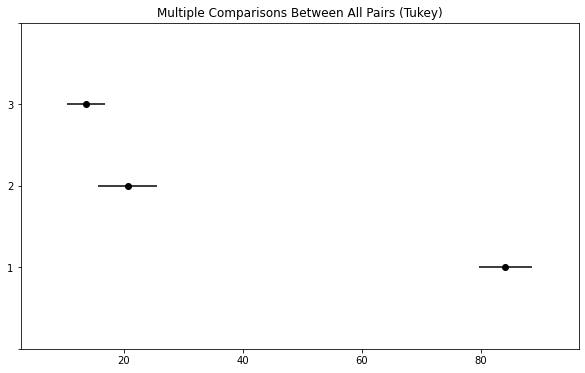

In [34]:
posthoc.plot_simultaneous()  ##그룹별 모평균의 95% 신뢰구간을 보여줌
plt.show()

In [30]:
## Scheffe 방식 (pip install scikit-posthocs)
## posthoc_scheffe(a = array or df, val_col = 종속변수, group_col = 독립변수, sort = True or False)
## return 값 : p-value
import scikit_posthocs as sp
sp.posthoc_scheffe(df, val_col = 'fare', group_col = 'pclass')

,3,1,2
3,1.00000,0.00000,0.13060
1,0.00000,1.00000,0.00000
2,0.13060,0.00000,1.00000


In [34]:
## Dunn's test
## posthoc_dunn(a = array or df, val_col = 종속변수, group_col = 독립변수, p_adjust = 'bonferroni' 외 p-value 계산 방법들 , sort = boolean)
## return 값: p-value
import scikit_posthocs as sp
sp.posthoc_dunn(df, val_col = 'fare', group_col = 'pclass', p_adjust = 'bonferroni')

,1,2,3
1,1.00000,0.00000,0.00000
2,0.00000,1.00000,0.00000
3,0.00000,0.00000,1.00000


In [33]:
### Games Howell's test
from pingouin import pairwise_gameshowell
pairwise_gameshowell(data = df, dv = 'fare', between = 'pclass').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,84.15500,20.66200,63.49300,5.42400,11.70600,229.72700,0.00100,1.17200
1,1,3,84.15500,13.67600,70.47900,5.36000,13.15000,219.28300,0.00100,1.07300
2,2,3,20.66200,13.67600,6.98700,1.12300,6.22200,294.77000,0.00100,0.53700


### 2. 단일변량분산분석 - (2) 이원분산분석(Two-way ANOVA)
- 종속변수는 1개, 독립변수는 2개 이상일 때 사용
- 독립변인 간 상호작용을 고려하기 위해서 사용함(변수 a의 변화에 따라 다른 독립변수 b도 변화하는가?)
- 가설 (세 개의 각기 다른 가설을 검정함)
    - 전체 H0: 변수A, 변수B, ... 에 따른 변수 C의 차이는 없다
    - H0: 독립변수 간 상호작용은 없다.
    - H0: 독립변수 A가 종속변수에 미치는 영향은 없다
    - H0: 독립변수 B가 종속변수에 미치는 영향은 없다
- Two-way ANOVA 또한 각 그룹의 데이터는 독립성, 정규성, 등분산성을 만족한다 (독립성은 일반적으로 존재한다고 봄)
- 만약 등분산성이 존재하지 않으면 Kruskal-Wallis test를 활용함


Step1. 등분산성 검정 (독립성과 정규성은 존재한다고 봄)

In [9]:
from scipy.stats import levene  ## 2개의 요인에 대한 집단과 교호작용으로 발생하는 집단 모두 분산이 같다는 것을 가정
##2개 요인의 집단
a1 = df[df['pclass']==1]['fare']
a2 = df[df['pclass']==2]['fare']
a3 = df[df['pclass']==3]['fare']
b1 = df[df['who']=='man']['fare']
b2 = df[df['who']=='woman']['fare']  ## 여기에 a1*b1 , a1*b2 등의 교호그룹까지 등분산성을 테스트해야 함

levene(a1,a2,a3,b1,b2)

LeveneResult(statistic=51.42274222122811, pvalue=6.49104982868014e-41)

In [7]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'fare ~ C(pclass) + C(who) + C(pclass):C(who)' ## class와 성별에 따른 fare차이
lm = ols(formula, df).fit()
print(anova_lm(lm))

                        df        sum_sq      mean_sq         F  PR(>F)
C(pclass)          2.00000  776030.05658 388015.02829 259.59519 0.00000
C(who)             2.00000   46015.46820  23007.73410  15.39295 0.00000
C(pclass):C(who)   4.00000   57434.32931  14358.58233   9.60638 0.00000
Residual         882.00000 1318318.93863   1494.69267       nan     nan


### 3. MANOVA (다변량분산분석)
- 그룹을 나누는 종속변인이 2개 이상일 때 사용
- 종속변인 간 상관관계가 있으면 MANOVA를 사용하고, 두 종속변인 간 상관관계가 없으면 종속변인 각각에 대한 단일변량 분산분석으로 진행 (MANOVA는 ANOVA에서는 밝힐 수 없는 종속변수 간 결합된 차이를 밝힐 수 있음. 또한 ANOVA를 여러번 사용하면 1종오류 확률이 커지는데 MANOVA를 통해 이 확률을 줄일 수 있음)
- 가설
    - H0: 독립변수 A, 독립변수 B에 따른 종속변수 C와 D의 차이는 없다
- 독립성, 집단의 등분산성, 반응변수의 다변량 정규성이 필요 _(종속변수 각각 정규분포를 따르면 다변량 정규성이 충족되는 것으로 봄)_

Step1. 종속변수 2개 간 상관관계가 존재하는지 확인  
아래 예시코드에서 방문빈도와 총 매출액은 양의 선형상관관계가 있는 것으로 확인되었으므로 MANOVA를 진행한다.

In [55]:
from scipy.stats import pearsonr
pearsonr(df2['방문빈도'], df2['총_매출액'])  ## X: 구매유형,거주지역 에 따른 Y: 방문빈도,총 매출액 차이 확인

(0.6311706453193394, 3.0519604496876793e-112)

Step2. MANOVA 수행
- 전체모형의 유의성, X1의 Y에 대한 유의성, X2의 Y에 대한 유의성 순으로 출력됨

In [56]:
from statsmodels.multivariate.manova import MANOVA
print(MANOVA.from_formula(' 방문빈도 + 총_매출액 ~ 구매유형 + 거주지역' , data = df2).mv_test()) ##mv_test는 통계량 산출 function

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

Step3. 사후분석 수행

In [6]:
from scikit_posthocs import posthoc_scheffe

###X, Y끼리 상관성 파악
print('총_매출액 ~ 구매유형\n', posthoc_scheffe(df2, val_col='총_매출액', group_col = '구매유형'))  #p-value 출력
print('\n 총_매출액 ~ 거주지역\n', posthoc_scheffe(df2, val_col = '총_매출액', group_col = '거주지역'))
print('\n 방문빈도 ~ 구매유형\n', posthoc_scheffe(df2, val_col = '방문빈도', group_col = '구매유형'))
print('\n 방문빈도 ~ 거주지역\n', posthoc_scheffe(df2, val_col = '방문빈도', group_col = '거주지역'))

## X별 그룹별 Y의 평균값 산정
평균총매출액 = pd.pivot_table(df2, index = '구매유형', columns = '거주지역', values = '총_매출액', aggfunc = np.mean)
print('\n구매유형, 거주지역별 평균총매출액\n', 평균총매출액)
평균방문빈도 = pd.pivot_table(df2, index = '구매유형', columns = '거주지역', values = '방문빈도', aggfunc = np.mean)
print('\n구매유형, 거주지역별 평균방문빈도\n', 평균방문빈도)

총_매출액 ~ 구매유형
         4       2       1       3
4 1.00000 0.00000 0.80464 0.00000
2 0.00000 1.00000 0.00000 0.00817
1 0.80464 0.00000 1.00000 0.00000
3 0.00000 0.00817 0.00000 1.00000

 총_매출액 ~ 거주지역
         6       4       5       7       3       2       1
6 1.00000 0.00803 0.00235 0.00000 0.01857 0.33868 0.98841
4 0.00803 1.00000 0.99998 0.00000 0.97776 0.98047 1.00000
5 0.00235 0.99998 1.00000 0.00000 0.93455 0.96487 1.00000
7 0.00000 0.00000 0.00000 1.00000 0.00000 0.00006 0.41212
3 0.01857 0.97776 0.93455 0.00000 1.00000 0.99991 1.00000
2 0.33868 0.98047 0.96487 0.00006 0.99991 1.00000 0.99997
1 0.98841 1.00000 1.00000 0.41212 1.00000 0.99997 1.00000

 방문빈도 ~ 구매유형
         4       2       1       3
4 1.00000 0.00000 0.02980 0.99781
2 0.00000 1.00000 0.00000 0.00000
1 0.02980 0.00000 1.00000 0.07466
3 0.99781 0.00000 0.07466 1.00000

 방문빈도 ~ 거주지역
         6       4       5       7       3       2       1
6 1.00000 0.00001 0.00011 0.00000 0.00000 0.00476 0.45140
4 0.00001 1.00000 0.

Scheffe test결과 p-value가 0.05 아래로 나타난 그룹 간에 차이가 발생하고 있다고 해석  
ex) 구매유형 1그룹과 2 그룹 사이에 총매출액의 차이가 유의하게 나타났다

참고) X1와 X2로 만들어지는 세부 그룹의 (Y1, Y2) 평균값을 산점도로 나타내면 그룹별 차이를 한 눈에 알아볼 수 있다

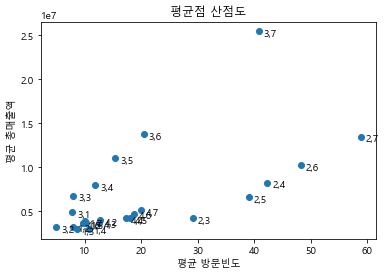

In [11]:
X = np.hstack(평균방문빈도.values[0:len(평균방문빈도)])  ##행(구매유형)별로 ndarray형식으로 변환
Y = np.hstack(평균총매출액.values[0:len(평균총매출액)])

labels = []
for i in range(1,5,1):   ##구매유형 (1~4),
    for j in range(1,8,1):   ##거주지역(1~7) 별로 좌표 생성
        labels.append(str(i)+','+str(j))
for label, x_count, y_count in zip(labels,X,Y):
    plt.annotate(label,                      ## 각 포인트의 주석
                xycoords = 'data',           ## 축의 좌표체계, 'data'= 인풋값을 좌표 (X,Y)로 찍음
                textcoords = 'offset points',## 주석이 찍히는 좌표체계
                xy = (x_count, y_count),
                xytext = (5,-5))
plt.title('평균점 산점도')
plt.xlabel('평균 방문빈도')
plt.ylabel('평균 총매출액')
plt.plot(X,Y,'o')

위와 같은 표를 생성했을 때, 평균 총매출액이 가장 높은 그룹(구매유형3-거주지역7)이나 평균 방문빈도가 가장 높은 그룹 (구매유형2-거주지역7)을 한 눈에 확인할 수 있다.

### 4. ANCOVA (공분산분석)
- 독립변수에 수치형변수가 포함된 경우, 수치형 변수(공변량)을 통제하여 순수한 독립변수의 효과를 확인할 때 사용
- 분산분석 모형
    $Y_{ij} = \mu + \alpha_{i} + \beta X_{ij} + \epsilon_{ij}$  
    $\mu \;= \;전체평균\;|\;\alpha_{i} \;= \;처리효과 \;| \;\beta X_{ij} = 공변량효과 \;| \;\epsilon_{ij} \;=\; 잔차$
- $\alpha$가 없을 때 일반적인 회귀모형으로, $\beta X_{ij}$가 없을 때 일반적인 분산분석 모형과 동일하므로 회귀분석과 분산분석이 결합된 모형으로 볼 수 있음
- 공변량을 통제하고 남은 독립변수 개수에 따라 일원공분산분석과 다원공분산분석으로 나눌 수 있음
- 가설
    - H0: X1을 통제한 상황에서 X2에 따른 Y의 차이가 없다

In [12]:
from pingouin import ancova
ancova(dv = '총_매출액',     ##종속변수 
      between = '거주지역',  ##독립변수
      covar = '방문빈도',    ##공변량
       data = df2)

,Source,SS,DF,F,p-unc,np2
0,거주지역,696696841274928.00000,6,4.04578,0.00052,0.02389
1,방문빈도,13701443685723464.00000,1,477.39282,0.00000,0.32489
2,Residual,28470960329516344.00000,992,nan,nan,nan


In [15]:
## 공변량을 통제하지 않았을 때 거주지역과 방문빈도의 관계
from pingouin import anova
anova(dv = '총_매출액', between = '거주지역', data = df2)

,Source,ddof1,ddof2,F,p-unc,np2
0,거주지역,6,993,24.75948,0.00000,0.13014


공변량을 통제했을 때 공분산분석 F값은 4.046이고, 통제하지 않았을 때 분산분석 F값은 24.7595로 방문빈도를 통제하지 않았을 때 거주지역별 매출액 차이가 과대평가 될 수 있다. (방문빈도 역시 매출액에 일정한 영향을 주고 있다)

# 비모수통계
__모수통계__ 란 모집단의 분포에 대해 특별한 가정을 세운 뒤 통계적 추론을 시도하는 것을 말한다 ex)해당 데이터는 정규분포를 따른다
1. 추론의 대상이 모평균, 모비율, 모분산 등과 같이 모집단의 모수(parameter)에 해당
2. 비교적 엄격한 가정을 전제로 함  

__비모수통계__ 는 모집단의 모수에 대해 전제하지 않고 수학적으로 추론하는 방법을 말한다
1. 모집단의 분포가 명확하지 않아 모수 통계방법을 사용하기 곤란할 때 대안으로 사용
2. 자료가 서열(rank)를 나타내거나 순수한 범주형 자료일 경우 사용
3. 간편한 방법으로 짧은 시간 내에 검정 결과를 알고자 하는 경우 사용

## 적합도 검정 (Goodness of fit)
### 1. RUN검정
- 표본의 배열이 무작위로 구성되어 있는지 확인
- H0: 데이터는 랜덤한 분포로 생성되어있다
- runstest_1samp(x, cutoff, correction = True)
    - cutoff: 'mean'(defalut),'median' (up, down을 나누는 
    - correction: True (default), 표본크기가 50이하일 때 test-statistic이 0.5로 보정됨(True일 때) 

In [16]:
from statsmodels.sandbox.stats.runs import runstest_1samp

data = [1,0,0,0,1,1,1,1,0,0,1,1,0,0,1,0]
runstest_1samp(data, correction = False)  ## z-statstic, p-value

(-0.5175491695067657, 0.6047728544859003)

- runstest_2samp(x, y=None, groups = None, correction = True)
    - 두 표본이 같은 분포에서 나왔는지 검정

### 2. Kolmogorov-Smirnov 검정 (콜모고로프-스미르노프 검정)
- 표본의 분포가 가정한 분포를 따르는지 검정
- H0: 데이터가 정규분포로부터 추출되었다
- 하이퍼파라미터
- kstest(rvs, cdf, arg = (), N = 20, alternative = 'two-sided', mode = 'auto')
    - arg : tuple 또는 sequence로 rvs와 cdf 분포에 추가 조건 달기
    - N : rvs의 sample size
    - alternative
        - 'two-sided' H0: F(x) = G(x) for all x (x1 ~ F, x2 ~ G)
        - 'less' H0: F(x) >= G(x) for all x
        - 'greater' H0: F(x) <= G(x) for all x

In [30]:
from scipy.stats import kstest

kstest(rvs = df['age'].dropna(),          ##분포를 검정할 데이터
      cdf = 'norm')              ##비교할 분포(분포의 1d array 또는 scipy.stats에 존재하는 분포 이름)

KstestResult(statistic=0.9650366565902186, pvalue=0.0)

In [38]:
from scipy.stats import ks_2samp

##비교용 test data X2 생성 (X2 ~ N(30,14))
test_data = np.random.normal(30,14,100)

ks_2samp(data1 = df['age'].dropna(),  
       data2 = test_data)             ## result = statistic, pvalue

KstestResult(statistic=0.09375350140056023, pvalue=0.39649232199533857)

## 동질성 검정 (Homogeneity)
### 1. Wilcoxon Signed-Rank Test  윌콕슨 부호순위 검정
- 두 paired data의 부호와 서열로 분포를 비교 (paired t-test) 자세한 사항은 t-test 부분에서 이미 설명함
- stats.wilcoxon(group1, group2)  

### 2. Mann-Whitney U Test  맨 휘트니 검정
- 표본의 크기가 30보다 작고, 표본의 분포가 정규분포를 따르지 않을 때 두 표본의 차이를 검정
- 표본은 독립성을 지녀야 함
- H0: 두 표본의 평균에 차이가 없다
- mannwhitneyu(x, y, alternative = 'two-sided')

In [39]:
from scipy.stats import mannwhitneyu

data1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
data2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

mannwhitneyu(data1, data2)

MannwhitneyuResult(statistic=50.0, pvalue=0.10569472950629227)

### 3. Kruskal-Wallis H Test  크루스칼 왈리스 검정
- 세 개 집단 이상의 독립표본 간 평균(비모수에서는 중앙값)의 차이가 존재하는지 검정 (맨 휘트니 검정의 확장)
- H0: 세 집단의 중앙값 차이는 없다

In [40]:
from scipy.stats import kruskal

data1 = [7, 14, 14, 13, 12, 9, 6, 14, 12, 8]
data2 = [15, 17, 13, 15, 15, 13, 9, 12, 10, 8]
data3 = [6, 8, 8, 9, 5, 14, 13, 8, 10, 9]

kruskal(data1, data2, data3)    

KruskalResult(statistic=6.287801578353988, pvalue=0.043114289703508814)

### 4. Friedman Test
- 세 개 집단 이상의 대응표본 분포를 비교 (two-way ANOVA의 비모수적 방법)
- H0: 세 집단의 중앙값 차이는 없다

In [41]:
from scipy.stats import friedmanchisquare

friedmanchisquare(data1, data2, data3)

FriedmanchisquareResult(statistic=2.2631578947368483, pvalue=0.3225236063732963)

## 상관성(독립성) 검정 (Independence)

- 서열, 또는 비율 척도를 이용하여 평가 대상 간의 일치성을 검정함
- 데이터의 순위를 이용하기 때문에 [1,2,3,9999]와 [1,2,3,4]는 같은 값으로 판단  

### 1. Spearman Rank Correlation
- 상관분석에서 다뤘던 내용으로 이전 내용 참고  

### 2. Kendall Rank Correlation (켄달의 T계수)
- 스피어만 상관계수와 비교해, 상대적으로 표본이 적고 순위 상에 동점이 많은 경우에 켄달 타우 계수가 대안이 될 수 있음
- 일치관계
    - x1>x2 and y1<y2  or x1<x2 and y1>y2  
    - x1>x2 and y1>y2  or x1<x2 and y1<y2  
- H0: 상관계수가 0이다 (두 순위 간 상관성이 없다)

In [42]:
from scipy.stats import kendalltau

data1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data2 = [1, 3, 6, 2, 7, 4, 5, 10, 11, 8, 9, 12]

kendalltau(data1,data2)

KendalltauResult(correlation=0.6969696969696969, pvalue=0.0009744810873283095)

# 포지셔닝분석
- 분석 대상의 다양한 정보를 좌표평면과 같이 시각적으로 판단이 용이한 방법으로 표현
- 요인분석이나 군집분석, 그룹핑 등의 방법 포지셔닝 기법의 일종이라고 생각할 수 있으나, 단순 그룹핑은 차원이 높거나 변수 간 중요도가 반영되어야 하는 상황에서 사용이 불가능함
- 사용 용어
    - 자극점: 비교 대상이 되는 관측개체 ex) 기업, 브랜드, 제품 등
    - 속성: 개체를 평가하기 위한 측정변수 ex) 이미지, 만족도, 품질 등
    - 이상점: 각 응답을 기반으로 한 자극점과 속성의 최적 선호 위치

## 다차원척도법(MDS: Multi-Dimensional Scaling)

### 1. 계량적MDS = PCoA(priciple coordinates anlysis)
- PCA와 매우 비슷하나, 
    - PCA: Euclidean 거리를 사용하고 선형관계가 있는 경우 사용 (대개 geological data)
    - PCoA: Euclidean 거리 외 측정방법을 사용하고 선형관계가 있으면 사용 (biogeographic data)
- 등간척도(만족도 조사), 비율척도(매출액, 방문빈도) 데이터를 사용
- 경쟁사를 파악할 때 단순히 하나의 변수가 아닌, 다양한 척도를 종합적으로 고려한 경쟁구도를 시각적으로 평가할 수 있게 하는 방법
- 주로 고객 만족도 조사를 바탕으로 브랜드 간의 심리적 거리 및 인지도를 표현하는 데 사용하기 때문에 '인지도 분석'이라고도 불린다.   
  
Step1. 각 관측개체의 차원을 축소한 좌표값을 계산
- n차원을 결정하기 위해 Kruskal의 스트레스값(축소됨으로써 나타난 정보손실률)을 계산하여 사용  
    Kruskal's stress = $ \sqrt{(자극점간실제거리-축소된자극점간거리)\over(자극점간실제거리)}$
- 실제로는 가장 친숙한 2차원 좌표평면에 표현하기 위해 관측값의 데이터를 2차원으로 축소함

In [35]:
from sklearn.manifold import MDS

##mds 분석용 데이터 생성
df_mds = pd.DataFrame([['전사',0,4,1,6,3,7,6,2,5],
             ['드루이드',4,0,4,4,4,4,4,4,4],
             ['성기사',1,4,0,6,3,7,6,3,5],
             ['마법사',6,4,6,0,5,2,1,5,2],
             ['사냥꾼',3,4,3,5,0,6,5,1,3],
             ['사제',7,4,7,2,6,0,2,6,3],
             ['흑마법사',6,4,6,1,5,2,0,5,2],
             ['도적',2,4,3,5,1,6,5,0,3],
             ['주술사',5,4,5,2,3,3,2,3,0]], columns = ['name','서울','인천','경기','강원','충청','경상','전라','제주','세종'])
df_mds = df_mds.set_index('name')  ##name 열은 index name으로 만들기

## 축소된 차원 좌표값 계산
clf = MDS(n_components = 2, random_state = 999).fit(df_mds)
X_mds = clf.fit_transform(df_mds)
X_mds

array([[-7.10566864, -1.06698513],
       [-1.04645435,  3.28640408],
       [-7.04527704,  0.27365805],
       [ 6.29199214,  0.85839784],
       [-2.93239139, -4.12028576],
       [ 6.04200469,  4.60299889],
       [ 5.98053976,  1.59430829],
       [-3.78463507, -3.58858045],
       [ 3.59988991, -1.83991581]])

참고) Kruskal의 Stress  
- 2차원으로 피팅된 데이터가 잘 적합되었는지 보여주는 지표로, 계산된 거리는 원 데이터와의 Dissmilarity 차이를 보여준다.
- 통상적으로 stress가 0.2 이상이면 적합도가 낮은 것으로 보고 차원을 높인다.

In [17]:
clf.stress_

7.8477749709646325

Step2. 축소된 데이터를 좌표평면에 나타내기
- 단순경쟁구조를 한 눈에 파악할 수 있다
- 가까이 위치한 관측치들은 비슷한 값을 가지고 있으므로 강력한 경쟁관계에 있다고 해석할 수 있다 

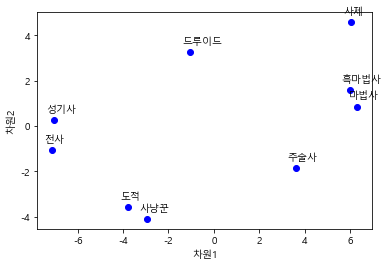

In [18]:
labels = df_mds.index.to_list()
for labels, x_count, y_count in zip(labels, X_mds[:,0], X_mds[:,1]):
    plt.annotate(labels, xycoords = 'data', textcoords = 'offset points', xy = (x_count, y_count), xytext = (-8,8))
plt.xlabel('차원1')
plt.ylabel('차원2')
plt.scatter(X_mds[:,0], X_mds[:,1], color = 'blue')

Step3. 필요한 경우 속성을 좌표평면계에 함께 나타내도록 한다
- 강력한 경쟁관계에 있는 데이터가 어떤 속성에서 비슷한 값을 갖는지 시각적으로 확인할 수 있음  
- 경쟁관계에 있는 자극점과 가까운 속성은 관측값들이 해당 속성에서 높은 값을 가지고 있음을 알려준다  
    아래 예시 데이터에서 사제, 흑마법사, 마법사는 서울/경기 지역에 주로 위치해 있으며 강원/경상/전라 지역에는 거의 없다는 걸 알 수 있음

In [32]:
import statsmodels.formula.api as smf
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()   ##
df_mds[df_mds.columns] = scaler.fit_transform(df_mds[df_mds.columns])

## 차원 좌표값 생성
clf = MDS(n_components = 2, random_state = 999).fit(df_mds)
X_mds = clf.fit_transform(df_mds)

## 속성의 차원 좌표값 계산
df_mds['차원1'] = X_mds[:,0]
df_mds['차원2'] = X_mds[:,1]
model = []
model.append(smf.ols(formula = '서울~차원1+차원2', data = df_mds).fit())
model.append(smf.ols(formula = '인천~차원1+차원2', data = df_mds).fit())
model.append(smf.ols(formula = '경기~차원1+차원2', data = df_mds).fit())
model.append(smf.ols(formula = '강원~차원1+차원2', data = df_mds).fit())
model.append(smf.ols(formula = '충청~차원1+차원2', data = df_mds).fit())
model.append(smf.ols(formula = '경상~차원1+차원2', data = df_mds).fit())
model.append(smf.ols(formula = '전라~차원1+차원2', data = df_mds).fit())
model.append(smf.ols(formula = '제주~차원1+차원2', data = df_mds).fit())
model.append(smf.ols(formula = '세종~차원1+차원2', data = df_mds).fit())
속성 = []
for i in range(0,9):
    속성.append([model[i].params[1], model[i].params[2]])  ##차원1과 2의 회귀계수
속성 = np.array(속성)
자극점및속성 = np.hstack([X_mds,속성])  ## 차원1,차원2,차원1회귀계수,차원2회귀계수가 붙게 됨
자극점및속성

array([[-1.09064938, -0.28241195,  0.35053673,  0.12586546],
       [-0.3467661 ,  0.83059472,  0.18074288, -0.46013817],
       [-1.09422299, -0.08543876,  0.35091267,  0.077871  ],
       [ 1.00275573,  0.17914583, -0.41023054, -0.03013613],
       [-0.41481584, -0.71275863,  0.12084613,  0.42123229],
       [ 0.88473516,  0.73953713, -0.33415993, -0.2051199 ],
       [ 0.94769211,  0.28867892, -0.40594582, -0.04045764],
       [-0.5355434 , -0.62041148,  0.15712313,  0.40999258],
       [ 0.64681471, -0.33693579, -0.36253703,  0.29392434]])

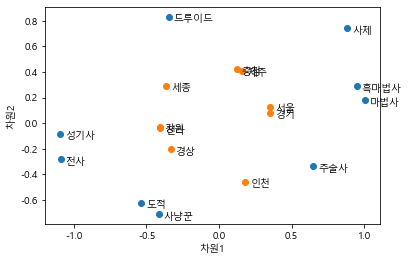

In [34]:
## 좌표평면계에 나타내기
labels = df_mds.index
for label, x_count, y_count in zip(labels, 자극점및속성[:,0], 자극점및속성[:,1]):
    plt.annotate(label, xycoords = 'data', textcoords = 'offset points', xy = (x_count, y_count), xytext = (5,-5))
labels2 = df_mds.columns
for label, x_count, y_count in zip(labels2, 자극점및속성[:,2], 자극점및속성[:,3]):
    plt.annotate(label, xycoords = 'data', textcoords = 'offset points', xy = (x_count, y_count), xytext = (5,-5))

plt.xlabel('차원1')
plt.ylabel('차원2')
plt.scatter(자극점및속성[:,0], 자극점및속성[:,1])
plt.scatter(자극점및속성[:,2], 자극점및속성[:,3])

### 2. 비계량적 MDS (NMDS: Non-MultiDimensional Scaling)
- Euclidean 거리 외 다른 거리 측정 방법을 사용하고 선형관계가 없으면 사용
- 차이에 대해 수치화한 값을 얻기 힘든 순서척도에 주로 사용 ex) 검정색-진회색-연회색-흰색 중 가장 밝은 색, 빈도수가 많은 데이터
- 차원이 미리 결정되어야 하고, local minima(지역적 최솟값)에 수렴될 가능성이 있으며, 시간이 오래 걸림
- 계량적 MDS와 똑같이 진행하나 DMS 함수에서 metric = False로 지정

In [37]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
df_mds[df_mds.columns] = scaler.fit_transform(df_mds[df_mds.columns])

## nmds 차원 좌표값 생성
clf2 = MDS(n_components = 2, random_state = 999, metric = False).fit(df_mds)
X_nmds = clf2.fit_transform(df_mds)



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'nMDS')

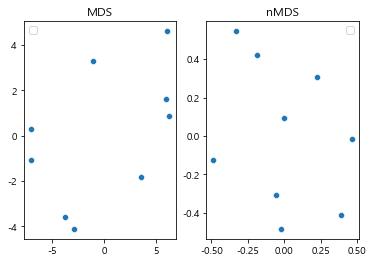

In [38]:
plt.subplot(121)
sns.scatterplot(x=X_mds[:,0],y=X_mds[:,1])
plt.legend(loc='best')
plt.title('MDS')

plt.subplot(122)
sns.scatterplot(x=X_nmds[:,0],y=X_nmds[:,1])
plt.legend(loc='best')
plt.title('nMDS')

## 상응분석(CA: Correspondence Analysis)
- 범주형 변수 간 상관관계 정보 뿐 아니라 변수가 갖는 group들이 어떤 패턴으로 연관되어 있는지 확인할 수 있음
### 1. 단순상응분석
- 하나의 관측치가 분할표 내에서 하나의 셀에서만 카운트되는 경우에 해당한다. 

Step1. 범주형변수의 분할표를 생성

In [43]:
##CCA용 데이터 불러오기
df_ca = pd.read_csv('예제데이터/Correspondence.csv',encoding = 'euc-kr')
df_ca.head()

,id,resort,slope,traffic,lodging,etc
0,1,대명,Slope-H,Traffic-H,Lodging-H,Etc-H
1,2,대명,Slope-H,Traffic-M,Lodging-H,Etc-L
2,3,대명,Slope-L,Traffic-M,Lodging-M,Etc-M
3,4,대명,Slope-L,Traffic-H,Lodging-M,Etc-M
4,5,대명,Slope-M,Traffic-M,Lodging-L,Etc-M


In [47]:
X = pd.crosstab(df_ca.resort,df_ca.slope, 
                margins = False)  ## 총계를 적을지 여부 결정 (True일시 행과 열의 총계를 함께 출력)
X

slope,Slope-H,Slope-L,Slope-M
resort,,,
대명,3,5,2
리솜,3,4,3
무주,2,6,2
용평,4,1,5
한화,5,2,3


Step2. 분할표의 기대분포를 계산한 뒤, 각 셀의 카이제곱통계량을 산출  
Step3. 카이제곱통계량을 기반으로 차원을 축소해 좌표값 생성

In [51]:
import prince
ca= prince.CA(n_components = 2).fit(X)
print('리조트 기준 차원좌표\n', ca.row_coordinates(X))
print('슬로프 기준 차원좌표\n', ca.column_coordinates(X))

리조트 기준 차원좌표
           0        1
대명 -0.29719  0.06450
리솜 -0.07967 -0.05295
무주 -0.49636 -0.06786
용평  0.55455 -0.15548
한화  0.31867  0.21179
슬로프 기준 차원좌표
                0        1
Slope-H  0.25639  0.15565
Slope-L -0.51505 -0.01240
Slope-M  0.32748 -0.16152


Step4. 좌표계 맵핑

<AxesSubplot:title={'center':'Principal coordinates'}, xlabel='Component 0 (90.30% inertia)', ylabel='Component 1 (9.70% inertia)'>

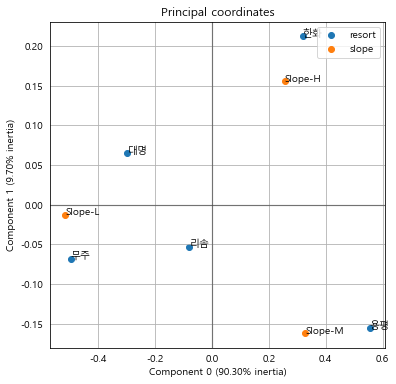

In [52]:
ca.plot_coordinates(X=X)

MDS와 마찬가지로 비슷한 위치에 있는 관측치들은 경쟁관계에 있으며, 가장 가까운 속성에 해당하는 범주가 해당 관측치의 특성이라고 볼 수 있다. 
예를 들어 한화리조트는 가장 난이도가 높은 슬로프를 가지고 있으며, 대명/무주/리솜 리조트는 슬로프 난이도가 낮은 편에 속하고 경쟁관계에 있다고 볼 수 있다. 

### 2. 다중상응분석 (MCA)
- 3개 이상의 범주형 변수들의 빈도교차표(분할표)를 이용하는 상응분석
- 복수의 응답으로 이루어진 자료를 활용한다
- 1개의 관측치가 분할표 상에서 최소한 2개 이상의 셀 빈도에 영향을 미친다

In [54]:
import prince

X = df_ca[['resort', 'slope', 'traffic', 'lodging', 'etc']]
mca = prince.MCA(n_components = 2).fit(X)
print('각 변수별 차원좌표\n', mca.column_coordinates(X))

각 변수별 차원좌표
                          0        1
resort_대명         -0.47820 -0.73212
resort_리솜          1.34094 -0.42703
resort_무주          0.19221  1.72878
resort_용평         -0.97808 -0.36667
resort_한화         -0.07688 -0.20295
slope_Slope-H      0.40469 -0.38212
slope_Slope-L      0.08603  0.42785
slope_Slope-M     -0.56188 -0.08036
traffic_Traffic-H -0.59702 -0.82484
traffic_Traffic-L  0.91446  0.51157
traffic_Traffic-M -0.29790  0.05832
lodging_Lodging-H  0.61471 -0.86562
lodging_Lodging-L -0.61567  0.66869
lodging_Lodging-M -0.06751  0.26030
etc_Etc-H          1.07072 -0.04984
etc_Etc-L         -0.55393 -0.26535
etc_Etc-M         -0.31814  0.22276


<AxesSubplot:title={'center':'Row and column principal coordinates'}, xlabel='Component 0 (15.25% inertia)', ylabel='Component 1 (13.16% inertia)'>

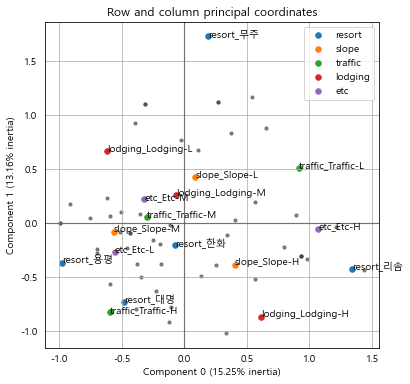

In [55]:
mca.plot_coordinates(X=X, show_column_labels = True)

가까운 관측치들은 경쟁관계, 가까운 속성은 해당 관측치가 가지고 있는 특성이라고 해석할 수 있다.  
x축과 y축에 쓰인 각 컴포넌트의 값은 전체분산(100)에서 해당 정도의 분산을 설명하는지 보여준다. 
현재 각 축에서 설명하는 분산을 합하면 약 28퍼센트 정도로, 2차원으로 축소하면서 전체 데이터의 70퍼센트 정도 정보손실이 일어났다고 볼 수 있다. 

## 연관성분석 (장바구니분석)
- 거래 데이터로부터 '함께' 구매가 발생하는 규칙을 도출하여, 고객이 특정 상품 구매시 이와 연관성이 높은 상품을 추천할 수 있음
- 연관규칙(Association Rule)을 통해 **A 이벤트가 일어났을 때 몇 퍼센트 확률로 B 이벤트가 함께 일어나는지** 분석
    - 신용카드 사기를 당했을 때 주로 결제되는 내역 패턴
    - 암 발생 시 빈번히 나타나는 DNA 패턴과 단백질 서열 검사
- 연관규칙의 종류
  - 행동 가능한 규칙: 룰의 의미가 이해되고 실행이 바로 가능한 정보  
    ex) 물-라면, 기저귀-맥주
  - 사소한 규칙: 이미 다 알고 있는 규칙으로 활용 관점은 낮지만 신뢰성 재확인 가능  
    ex) 삼겹살-상추
  - 설명 불가능한 규칙: 설명되지 않고 실제 행동을 취할 수 없는 규칙  
    ex) 허리케인->딸기맛사탕
- 연관규칙의 빈도 평가 척도
    - 지지도(Support)
        - 특정 아이템 구매가 발생한 빈도
        - support(X) = $n(X) \over N$  (N은 전체 구매 건수)
        - support(X,Y) = $n(X∩Y) \over N$
    - 신뢰도(Confidence)
        - 아이템 X를 포함하는 거래 중 아이템 Y도 거래한 비율 (전체에서 X의 거래빈도가 낮을 때 X-Y의 동시 거래 빈도를 더 정확히 측정 가능)
        - confidence(X→Y) = $n(X \cap Y) \over n(X)$
    - 향상도(Lift)
        - Y 구매가 이루어진 확률 대비 X를 샀을 때 Y도 같이 구매했을 확률
        - Lift가 1보다 클수록 + 관계, 작을수록 -관계로 우연적 확률에서 멀어짐
        - lift(X→Y) = $ confidence(X → Y) \over support(Y) $  
    - leverage
         - X와 Y가 함께 구매되는 확률에서 독립사건인 X구매와 Y구매가 함께 이루어질 확률(즉 우연적으로 발생할 수 있는 X와 Y의 동시 구매 확률)을 뺀 값
         - levarage(X→Y) = support(X→Y) - support(X) x support(Y)  &nbsp;&nbsp;   leverage range in (-1,1)  
    - conviction
        - conviction 값이 클 수록 Y의 구매는 X의 구매 여부에 영향을 많이 받는다는 의미
        - conviction(X→Y) = $1-support(Y) \over 1-confidence(X→Y)$ &nbsp;&nbsp;   conviction range in (0,$\infty$)

In [43]:
## 예시 구매데이터 생성
data = [['milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
        ['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'], 
        ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
        ['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
        ['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]
df_transaction = pd.DataFrame(data) ## 행은 고객, 열은 고객이 산 데이터가 들어간 dataframe 생성

Step1. 구매물품 리스트를 트랜잭션 데이터로 변환하기

In [50]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_data = te.fit(data).transform(data)
te_data = pd.DataFrame(te_data, columns = te.columns_) ##행은 구매순, 열은 제품명이 들어간 데이터프레임

##참고) 구매 데이터가 dataframe 형식인 경우 아래와 같이 리스트 형태로 바꿔서 TransactionEncoder에 입력
data = df_transaction.values.tolist()

Step2. apriori 알고리즘을 적용하여 함께 구매되는 아이템셋의 데이터프레임 만들기
- apriori(df, min_support = 0.5, use_colnames= False, max_len = None -_함께 구매되는 itemset 조합의 개수_)

In [61]:
from mlxtend.frequent_patterns import apriori

freq_items = apriori(te_data, min_support = 0.3, use_colnames = True) ## 최소지지도가 0.3인 '함께 구매된' 조합
freq_items.tail(5)

,support,itemsets
29,0.40000,"(Yogurt, Apple, Beans, Cookie)"
30,0.40000,"(Yogurt, Apple, Eggs, Beans)"
31,0.40000,"(Yogurt, Apple, Eggs, Cookie)"
32,0.40000,"(Yogurt, Eggs, Beans, Cookie)"
33,0.40000,"(Apple, Eggs, Cookie, Yogurt, Beans)"


Step3. 함께 구매된 목록의 연관규칙 평가결과를 출력하기
- association_rules(df = 아이템셋df, metric = "confidence", min_threshold = 0.8, support_only = False)
    - metric: 어떤 평가척도를 기준으로 결과를 필터링할 것인지 결정
    - min_threshold = 필터링을 위한 평가척도의 최소값
    - support_only = 결과물에서 지지도만 계산하고 나머지 평가척도는 nan으로 출력(True일 시)

In [62]:
from mlxtend.frequent_patterns import association_rules

rule1= association_rules(freq_items, metric = "confidence", min_threshold = 0.8)
rule1.sort_values(by = 'confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Apple),(Eggs),0.60000,0.80000,0.60000,1.00000,1.25000,0.12000,inf
48,"(Yogurt, Apple)","(Eggs, Cookie)",0.40000,0.60000,0.40000,1.00000,1.66667,0.16000,inf
55,"(Yogurt, Eggs)","(Beans, Cookie)",0.40000,0.60000,0.40000,1.00000,1.66667,0.16000,inf
54,"(Yogurt, Beans, Cookie)",(Eggs),0.40000,0.80000,0.40000,1.00000,1.25000,0.08000,inf
53,"(Yogurt, Eggs, Cookie)",(Beans),0.40000,0.80000,0.40000,1.00000,1.25000,0.08000,inf
...,...,...,...,...,...,...,...,...,...
24,"(Apple, Eggs, Beans)",(Cookie),0.40000,0.60000,0.40000,1.00000,1.66667,0.16000,inf
23,"(Yogurt, Cookie)",(Eggs),0.40000,0.80000,0.40000,1.00000,1.25000,0.08000,inf
22,"(Yogurt, Eggs)",(Cookie),0.40000,0.60000,0.40000,1.00000,1.66667,0.16000,inf
21,"(Yogurt, Eggs)",(Beans),0.40000,0.80000,0.40000,1.00000,1.25000,0.08000,inf


참고) 함께 구매된 아이템셋 개수를 출력하기

In [64]:
rule1['antecedents_len'] = rule1['antecedents'].apply(lambda x:len(x))
rule1.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
71,"(Apple, Cookie)","(Yogurt, Eggs, Beans)",0.40000,0.40000,0.40000,1.00000,2.50000,0.24000,inf,2
72,"(Yogurt, Apple)","(Eggs, Beans, Cookie)",0.40000,0.60000,0.40000,1.00000,1.66667,0.16000,inf,2
73,"(Apple, Beans)","(Yogurt, Eggs, Cookie)",0.40000,0.40000,0.40000,1.00000,2.50000,0.24000,inf,2
74,"(Yogurt, Eggs)","(Apple, Beans, Cookie)",0.40000,0.40000,0.40000,1.00000,2.50000,0.24000,inf,2
75,"(Yogurt, Cookie)","(Apple, Eggs, Beans)",0.40000,0.40000,0.40000,1.00000,2.50000,0.24000,inf,2
